# Homework - Area Processing Part.1
1. Implement smoothing filters
    - Average filter, Gaussian filter, Median filter
    - Variable mask size
2. Eliminate some noises using either Gaussian filter and Median filter and Compare their performance (gray-scale image)
    - Gaussian noise + the original image
    - Salt-and-pepper noise + the original image
3. Apply average filter to given color image (Mean/Gaussian filter)
4. Apply High-boost filter to some images

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

1. Implement smoothing filters

In [28]:
from common.functions import convolution

def average_filter(img, k=3):
    mask_size = (2 * k + 1, 2 * k + 1)
    mean_kernel = np.full(mask_size, 1 / mask_size[0]**2)
    return convolution(img, mean_kernel)

def gaussian_filter(img, k=3):
    mask_size = (2 * k + 1, 2 * k + 1)
    gaussian_kernel = np.empty(mask_size)
    # make gaussian_kernel
    gaussian_kernel = (1 / 74) * np.array([[1, 2, 3, 2, 1],
                                       [2, 4, 5, 4, 2],
                                       [3, 5, 6, 5, 3],
                                       [2, 4, 5, 4, 2],
                                       [1, 2, 3, 2, 1]])
    return convolution(img, gaussian_kernel)

def median_filter(img, k=3):
    filtered = np.zeros_like(img)

    for v in range(k, img.shape[0] - k):
        for u in range(k, img.shape[1] - k):
            filtered[v][u] = np.median(img[v-k:v+k, u-k:u+k])

    return filtered

In [27]:
img_gaussian.shape

(440, 455)

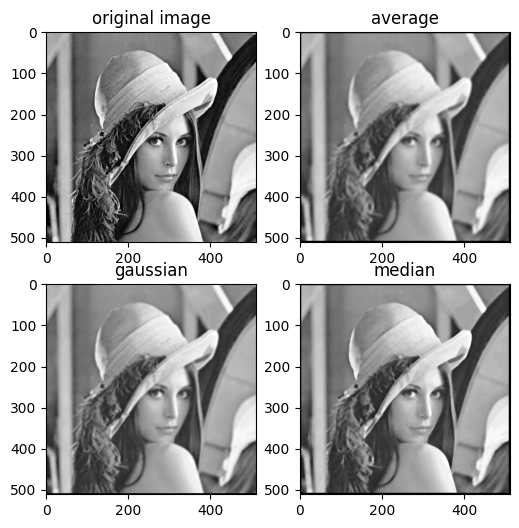

In [13]:
# Plot
img = cv2.imread('images/originals/lenna_color.bmp', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6, 6))

plt.subplot(2, 2, 1)
plt.title('original image')
plt.imshow(img, cmap='gray')

plt.subplot(2, 2, 2)
plt.title('average')
plt.imshow(average_filter(img), cmap='gray')

plt.subplot(2, 2, 3)
plt.title('gaussian')
plt.imshow(gaussian_filter(img), cmap='gray')

plt.subplot(2, 2, 4)
plt.title('median')
plt.imshow(median_filter(img), cmap='gray')

2. Eliminate some noises using either Gaussian filter and Median filter and compare their performance

(784, 778)
(790, 788)


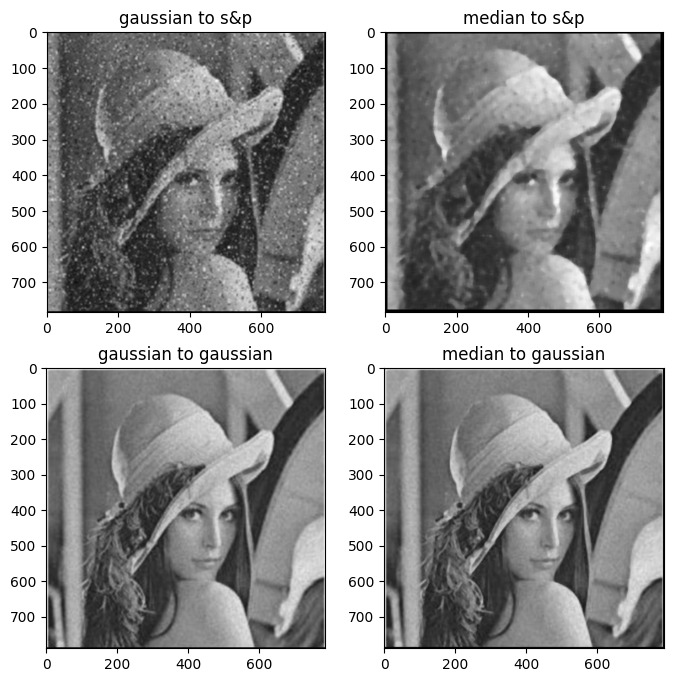

In [32]:
# img_saltpep = cv2.imread('images/ckt-saltpep.jpg', cv2.IMREAD_GRAYSCALE)
# img_gaussian = cv2.imread('images/ckt-gaussian-noise.jpg', cv2.IMREAD_GRAYSCALE)
img_saltpep = cv2.imread('images/lena-saltpep.png', cv2.IMREAD_GRAYSCALE)
img_gaussian = cv2.imread('images/lena-gaussian-noise.png', cv2.IMREAD_GRAYSCALE)

print(img_saltpep.shape)
print(img_gaussian.shape)

# Plot
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.title('gaussian to s&p')
plt.imshow(gaussian_filter(img_saltpep, 7), cmap='gray')

plt.subplot(2, 2, 2)
plt.title('median to s&p')
plt.imshow(median_filter(img_saltpep, 7), cmap='gray')

plt.subplot(2, 2, 3)
plt.title('gaussian to gaussian')
plt.imshow(gaussian_filter(img_gaussian), cmap='gray')

plt.subplot(2, 2, 4)
plt.title('median to gaussian')
plt.imshow(median_filter(img_gaussian), cmap='gray')

3. Apply average filter to given color image

In [ ]:
def average_filter_intensity():
    pass

def average_filter_rgb():
    pass

# Plot
# color intens rgb

4. Apply High-boost filter to some images

In [37]:
def highboost_filter(img, A=1, mode='n4'):
    if mode == 'n4':
        hb_kernel = np.array([
            [0, -1, 0],
            [-1, A + 4, -1],
            [0, -1, 0]
        ])
    elif mode == 'n8':
        hb_kernel = np.array([
            [-1, -1, -1],
            [-1, A + 8, -1],
            [-1, -1, -1]
        ])
    return convolution(img, hb_kernel)

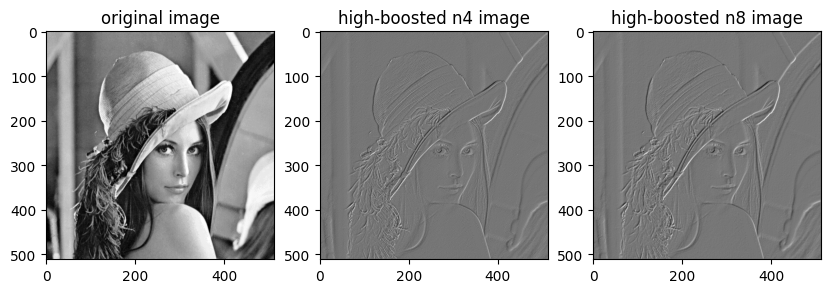

In [44]:
img = cv2.imread('images/originals/lenna_color.bmp', cv2.IMREAD_GRAYSCALE)

img_hb_n4 = highboost_filter(img, 0, mode='n4')
img_hb_n8 = highboost_filter(img, 0, mode='n8')

plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.title('original image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('high-boosted n4 image')
plt.imshow(img_hb_n4, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('high-boosted n8 image')
plt.imshow(img_hb_n8, cmap='gray')